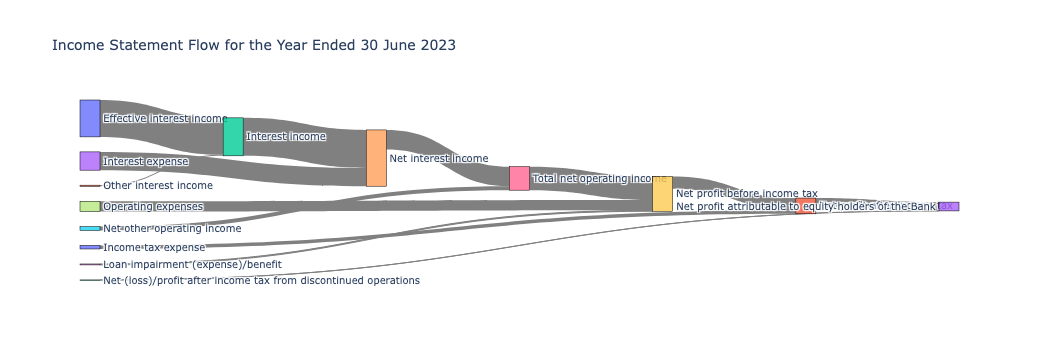

In [7]:
import plotly.graph_objects as go

# Define the nodes and links for the Sankey diagram
nodes = [
    "Effective interest income", "Other interest income", "Interest income", "Interest expense", "Net interest income", 
    "Net other operating income", "Total net operating income", "Operating expenses", "Loan impairment (expense)/benefit", 
    "Net profit before income tax", "Income tax expense", "Net profit after income tax", 
    "Net (loss)/profit after income tax from discontinued operations", "Net profit attributable to equity holders of the Bank"
]

# Create node indices for easy reference
node_indices = {node: i for i, node in enumerate(nodes)}

# Define the links based on the income statement structure for 30 Jun 23
links = [
    {"source": node_indices["Effective interest income"], "target": node_indices["Interest income"], "value": 43182},
    {"source": node_indices["Other interest income"], "target": node_indices["Interest income"], "value": 1293},
    {"source": node_indices["Interest income"], "target": node_indices["Net interest income"], "value": 43182 + 1293},
    {"source": node_indices["Interest expense"], "target": node_indices["Net interest income"], "value": -21419},
    {"source": node_indices["Net interest income"], "target": node_indices["Total net operating income"], "value": 23056},
    {"source": node_indices["Net other operating income"], "target": node_indices["Total net operating income"], "value": 4474},
    {"source": node_indices["Total net operating income"], "target": node_indices["Net profit before income tax"], "value": 27530},
    {"source": node_indices["Operating expenses"], "target": node_indices["Net profit before income tax"], "value": -12079},
    {"source": node_indices["Loan impairment (expense)/benefit"], "target": node_indices["Net profit before income tax"], "value": -1108},
    {"source": node_indices["Net profit before income tax"], "target": node_indices["Net profit after income tax"], "value": 14343},
    {"source": node_indices["Income tax expense"], "target": node_indices["Net profit after income tax"], "value": -4155},
    {"source": node_indices["Net profit after income tax"], "target": node_indices["Net profit attributable to equity holders of the Bank"], "value": 10188},
    {"source": node_indices["Net (loss)/profit after income tax from discontinued operations"], "target": node_indices["Net profit attributable to equity holders of the Bank"], "value": -98},
]

# Create the Sankey diagram using Plotly
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=[link["source"] for link in links],
        target=[link["target"] for link in links],
        value=[abs(link["value"]) for link in links],  # Ensure all values are positive for the diagram
        color="black"
    )
)])

fig.update_layout(title_text="Income Statement Flow for the Year Ended 30 June 2023", font_size=10)
fig.show()

In [5]:
import pandas as pd

# Create a DataFrame for the income statement data
data = {
    "Category": [
        "Effective interest income", "Other interest income", "Interest income", "Interest expense", "Net interest income", 
        "Net other operating income", "Total net operating income", "Operating expenses", "Loan impairment (expense)/benefit", 
        "Net profit before income tax", "Income tax expense", "Net profit after income tax", 
        "Net (loss)/profit after income tax from discontinued operations", "Net profit attributable to equity holders of the Bank"
    ],
    "Amount (AUD millions)": [
        43182, 1293, 44475, -21419, 23056, 4474, 27530, -12079, -1108, 14343, -4155, 10188, -98, 10090
    ]
}

# Convert to DataFrame
income_statement_df = pd.DataFrame(data)
print(income_statement_df)

                                             Category  Amount (AUD millions)
0                           Effective interest income                  43182
1                               Other interest income                   1293
2                                     Interest income                  44475
3                                    Interest expense                 -21419
4                                 Net interest income                  23056
5                          Net other operating income                   4474
6                          Total net operating income                  27530
7                                  Operating expenses                 -12079
8                   Loan impairment (expense)/benefit                  -1108
9                        Net profit before income tax                  14343
10                                 Income tax expense                  -4155
11                        Net profit after income tax                  10188